In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#### load data
Attributes
- ID
- Age
- Gender
- Income
- Spending score


In [2]:
data = pd.read_csv('customer_data.csv')

In [3]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

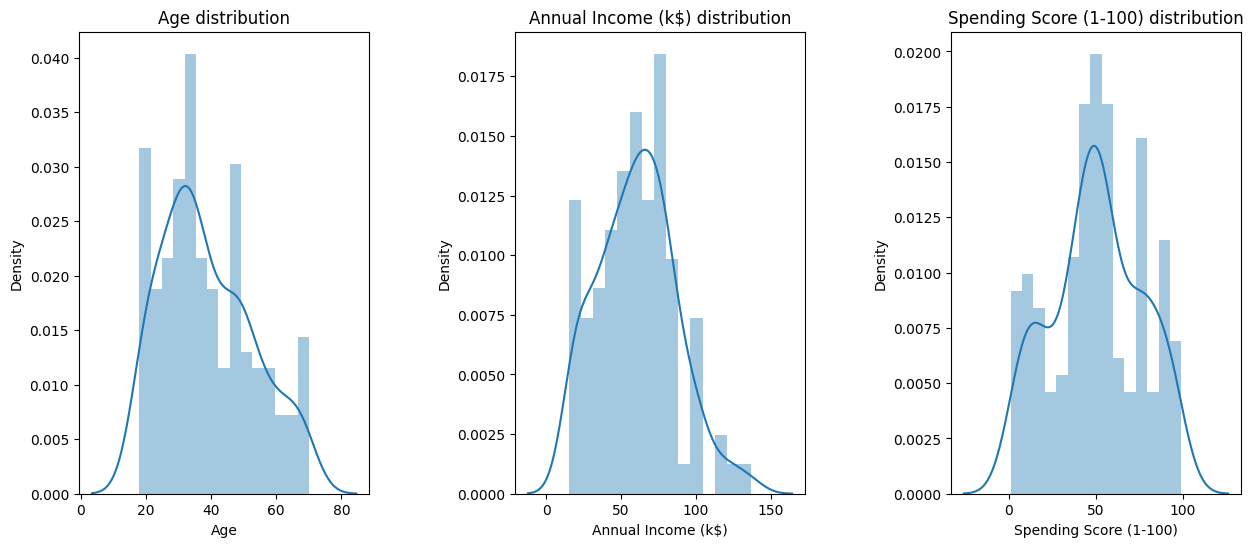

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for col in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data[col] , bins = 15)
    plt.title(f'{col} distribution')
plt.show()

<Axes: xlabel='Gender'>

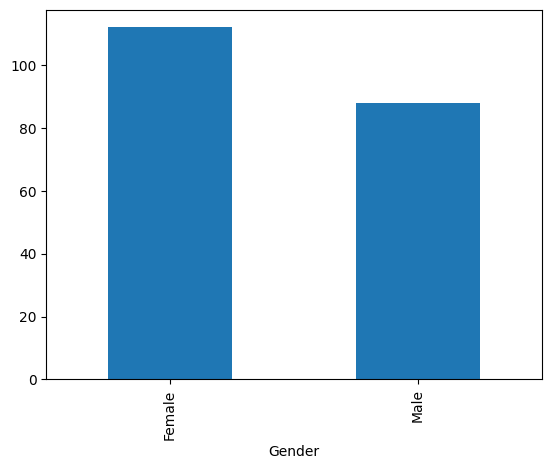

In [11]:
data['Gender'].value_counts().plot(kind='bar')

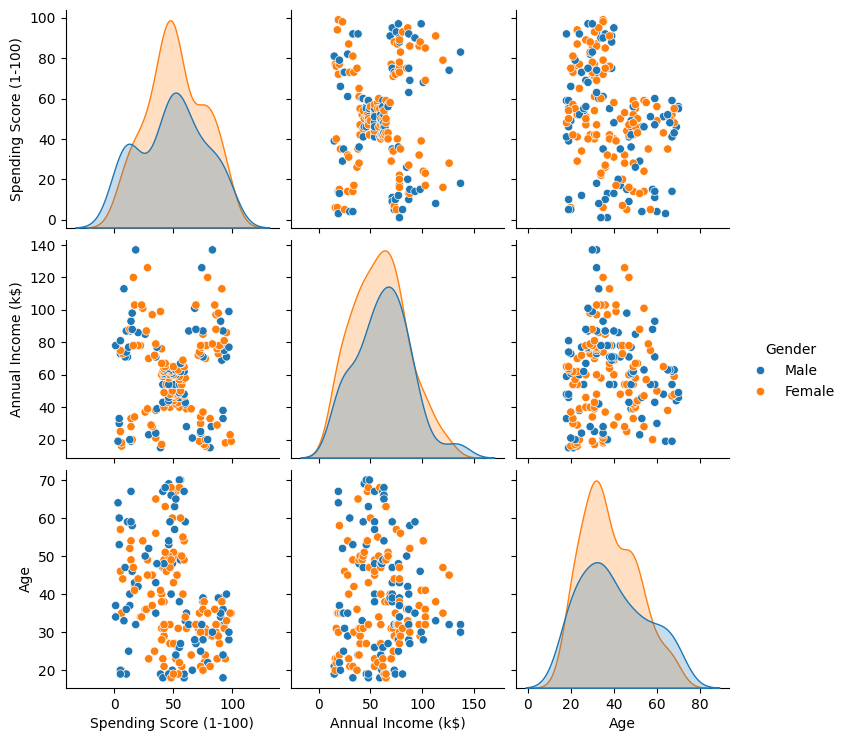

In [12]:
sns.pairplot(data, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

##### clustering

In [13]:
def get_elbow_graph(X):
    scaler = MinMaxScaler().fit(X)
    scaler.transform(X)

    wcss = []
    for i in range(1,11):
        kmeans= KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(X)
        wcss.append(kmeans.inertia_) 
        
    plt.figure(figsize = (8,6))
    plt.grid()
    plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
            marker='o', markerfacecolor='blue', markersize=12)
    plt.title('elbow point graph')
    plt.xlabel('number of clusters')
    plt.ylabel('WCSS')
    
def clustering_model(X, clusters, xcol):
    kmeans= KMeans(n_clusters = clusters, init = 'k-means++') 
    label= kmeans.fit_predict(X)
    
    plt.figure(figsize=(8,8))
    plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
    plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
    plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
    plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
    plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')
    plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods')
    plt.title('Customer groups')
    plt.xlabel(xcol)
    plt.ylabel('Spending Score (1-100)')
    plt.legend()

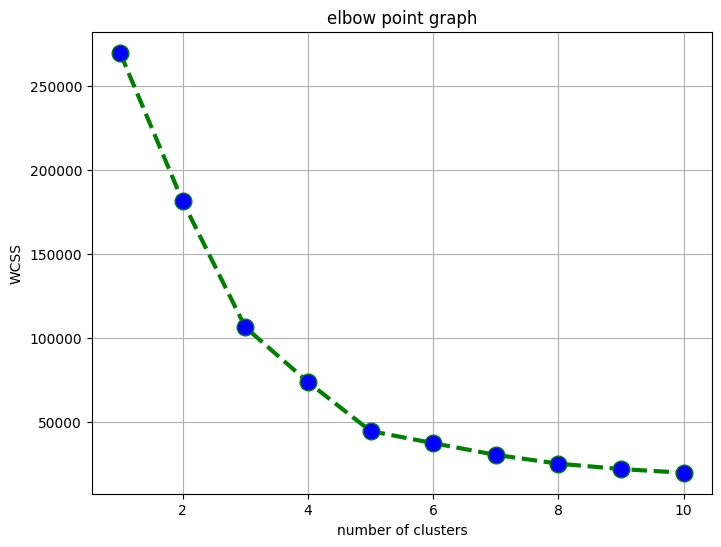

In [14]:
# clustering based on annual income and spending score
X1 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
get_elbow_graph(X1)

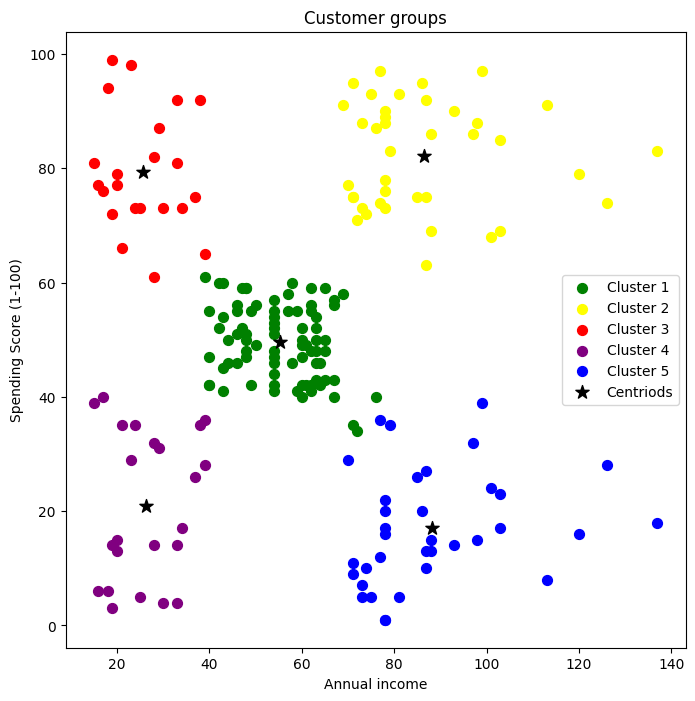

In [15]:
clustering_model(X1, 5, 'Annual income')

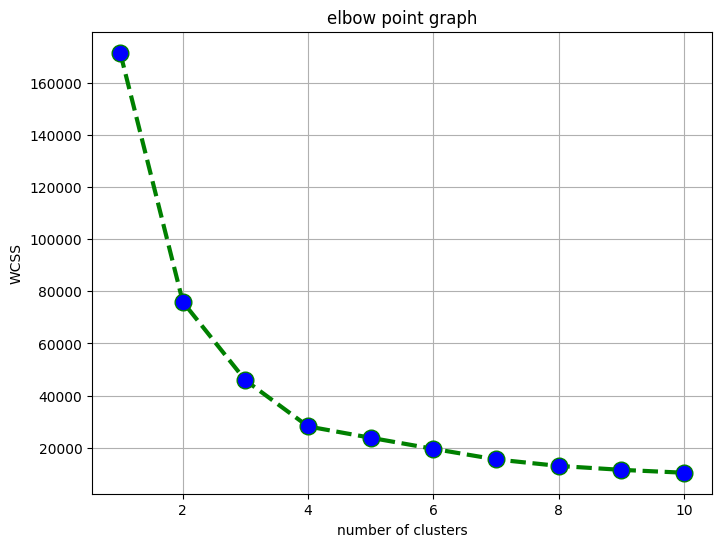

In [16]:
# clusteting based on Age and spending score
X2 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
get_elbow_graph(X2)

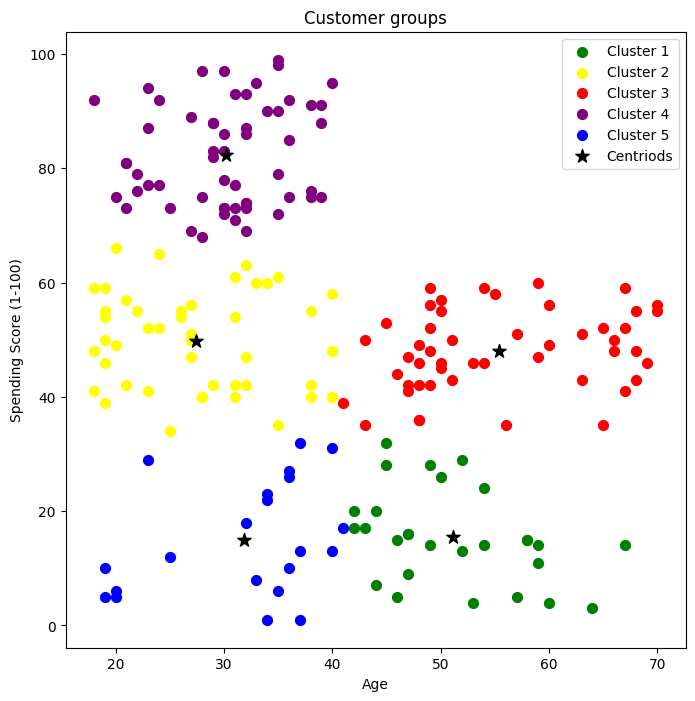

In [17]:
clustering_model(X2, 5, 'Age')

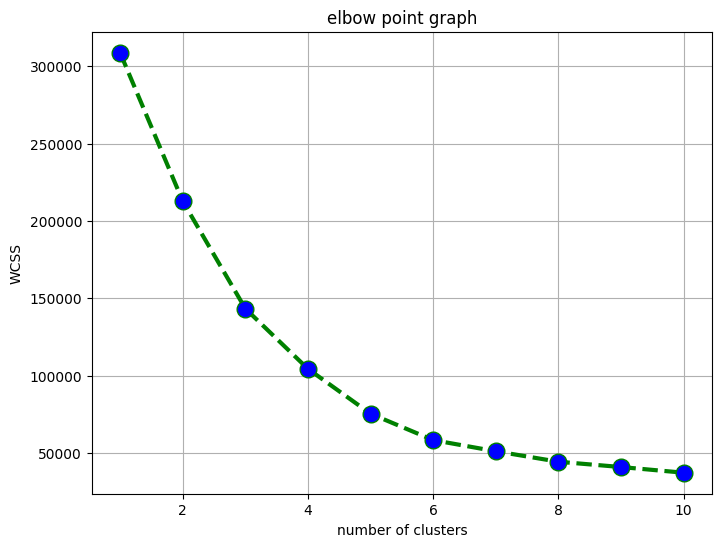

In [18]:
# clustering based on 3D data
X3=data[["Age","Annual Income (k$)","Spending Score (1-100)"]]
get_elbow_graph(X3)

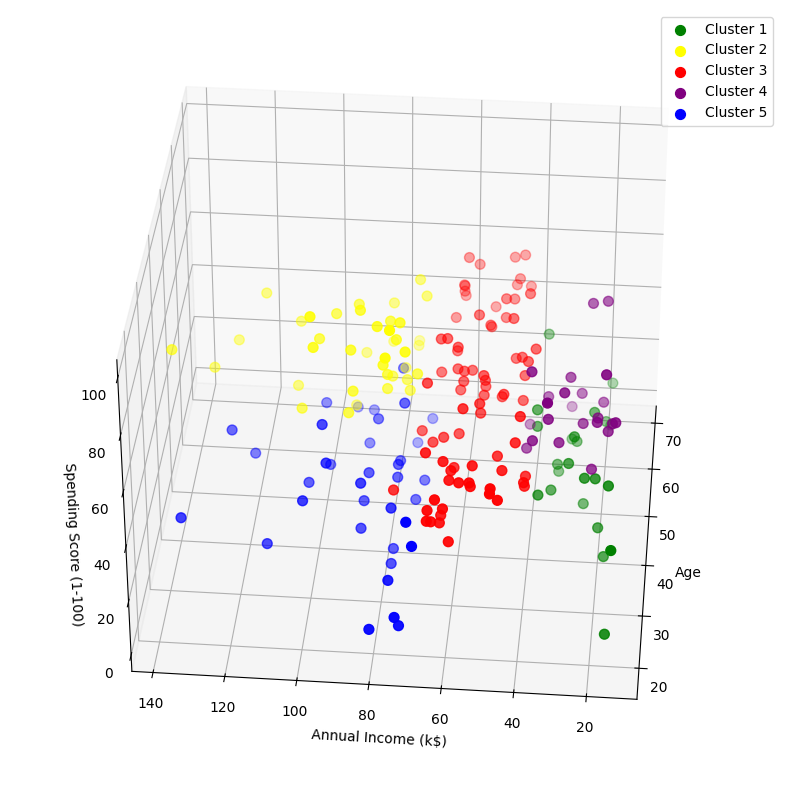

In [19]:
model = KMeans(n_clusters=5)
y3 = model.fit_predict(X3)
X3["label"] = y3


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3.Age[X3.label == 0], X3["Annual Income (k$)"][X3.label == 0], X3["Spending Score (1-100)"][X3.label == 0], s=50, c='green', label='Cluster 1')
ax.scatter(X3.Age[X3.label == 1], X3["Annual Income (k$)"][X3.label == 1], X3["Spending Score (1-100)"][X3.label == 1], s=50, c='yellow', label='Cluster 2')
ax.scatter(X3.Age[X3.label == 2], X3["Annual Income (k$)"][X3.label == 2], X3["Spending Score (1-100)"][X3.label == 2], s=50, c='red', label='Cluster 3')
ax.scatter(X3.Age[X3.label == 3], X3["Annual Income (k$)"][X3.label == 3], X3["Spending Score (1-100)"][X3.label == 3], s=50, c='purple', label='Cluster 4')
ax.scatter(X3.Age[X3.label == 4], X3["Annual Income (k$)"][X3.label == 4], X3["Spending Score (1-100)"][X3.label == 4], s=50, c='blue', label='Cluster 5')
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()


In [20]:
cust1=X3[X3["label"]==1]
print('No. of customers in 1st group=', len(cust1))

cust2=X3[X3["label"]==2]
print('No. of customers in 2nd group=', len(cust2))

cust3=X3[X3["label"]==0]
print('N0. of customers in 3rd group=', len(cust3))

cust4=X3[X3["label"]==3]
print('No. of customers in 4th group=', len(cust4))

cust5=X3[X3["label"]==4]
print('No. of customers in 5th group=', len(cust5))

No. of customers in 1st group= 39
No. of customers in 2nd group= 79
N0. of customers in 3rd group= 23
No. of customers in 4th group= 23
No. of customers in 5th group= 36
